Load in and format OTU tables from QIIME and the associated metadata:

In [53]:
import pandas as pd 

df = pd.read_csv('/content/qiime_three.txt', sep = '\t', index_col = 0)

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df = df.transpose()

In [56]:
y = pd.read_csv('/content/merged_three_Countrymetadata.tsv', sep = '\t')[['SampleID', 'Other_than_BF']]

In [57]:
y

,SampleID,Other_than_BF
0,3101193,True
1,3107294,True
2,3113022,True
3,3107293,True
4,3101190,True
...,...,...
1941,3119976,True
1942,3117647,True
1943,3103438,False
1944,3116926,True


In [58]:
y.rename(columns = {'Other_than_BF': 'target'}, inplace = True)

In [59]:
df.reset_index(inplace = True)
df.rename(columns = {'sample': 'index', 'index':'SampleID'}, inplace = True)
df

sample,SampleID,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__unclassified|470690,k__Bacteria,k__Bacteria|p__Actinobacteria|c__Actinobacteria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__unclassified|12568,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__unclassified|370432,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__unclassified|565136,...,k__Bacteria|p__Tenericutes|c__Mollicutes|o__RF39|f__unclassified|g__unclassified|s__unclassified|33343,k__Bacteria|p__Tenericutes|c__Mollicutes|o__RF39|f__unclassified|g__unclassified|s__unclassified|368734,k__Bacteria|p__Tenericutes|c__Mollicutes|o__RF39|f__unclassified|g__unclassified|s__unclassified|513605,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|178331,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|264696,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|363731,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|561627,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|588471,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|593043
0,3100170,0.0,22452.0,3062.0,24.0,24.0,20.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3100175,0.0,80360.0,9373.0,48.0,30.0,21.0,0.0,20.0,0.0,...,0.0,0.0,0.0,1138.0,5.0,1131.0,2.0,0.0,0.0,0.0
2,3100176,0.0,17359.0,1776.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,179.0,0.0,179.0,0.0,0.0,0.0,0.0
3,3104031,0.0,37957.0,4767.0,15.0,14.0,14.0,0.0,14.0,0.0,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0
4,3100180,0.0,26033.0,21736.0,217.0,207.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,3100051,0.0,7831.0,1328.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1580,3106020,0.0,20256.0,513.0,146.0,146.0,146.0,146.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1581,3105691,0.0,183560.0,3982.0,21.0,17.0,12.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1582,3105284,0.0,83811.0,4671.0,19.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,236.0,0.0,236.0,0.0,0.0,0.0,0.0


In [60]:
df['SampleID'] = df['SampleID'].astype(int)

In [61]:
y['SampleID'] = y['SampleID'].astype(float)

In [62]:
y['SampleID'].dtype

dtype('float64')

Get rid of samples with no associated targets and vice versa:

In [63]:
df = df.merge(y, how = 'left', on = 'SampleID')

In [64]:
df

,SampleID,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__unclassified|470690,k__Bacteria,k__Bacteria|p__Actinobacteria|c__Actinobacteria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__unclassified|12568,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__unclassified|370432,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__unclassified|565136,...,k__Bacteria|p__Tenericutes|c__Mollicutes|o__RF39|f__unclassified|g__unclassified|s__unclassified|368734,k__Bacteria|p__Tenericutes|c__Mollicutes|o__RF39|f__unclassified|g__unclassified|s__unclassified|513605,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|178331,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|264696,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|363731,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|561627,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|588471,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila|593043,target
0,3100170,0.0,22452.0,3062.0,24.0,24.0,20.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,3100175,0.0,80360.0,9373.0,48.0,30.0,21.0,0.0,20.0,0.0,...,0.0,0.0,1138.0,5.0,1131.0,2.0,0.0,0.0,0.0,True
2,3100176,0.0,17359.0,1776.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,179.0,0.0,179.0,0.0,0.0,0.0,0.0,False
3,3104031,0.0,37957.0,4767.0,15.0,14.0,14.0,0.0,14.0,0.0,...,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,True
4,3100180,0.0,26033.0,21736.0,217.0,207.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,3100051,0.0,7831.0,1328.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1580,3106020,0.0,20256.0,513.0,146.0,146.0,146.0,146.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1581,3105691,0.0,183560.0,3982.0,21.0,17.0,12.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1582,3105284,0.0,83811.0,4671.0,19.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,236.0,0.0,236.0,0.0,0.0,0.0,0.0,True


In [65]:
X = df.drop('target', axis=1)
y = df['target']

In [66]:
print("Class distribution:")
print(y.value_counts())

Class distribution:
True     1084
False     500
Name: target, dtype: int64


Exploratory Data Analysis

In [ ]:
#TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE 
n_components = 2
tsne = TSNE(n_components, perplexity=4)
tsne_result = tsne.fit_transform(X)
tsne_result.shape

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1584, 2)

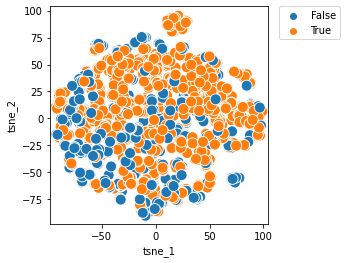

In [ ]:
# Plot the result of our TSNE with the label color coded
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

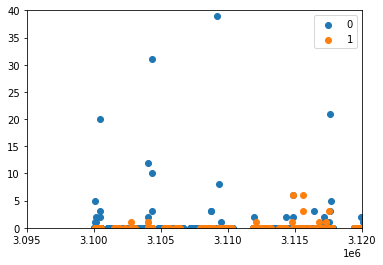

In [ ]:
#K-Means Clustering
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import matplotlib.pyplot as plt
import numpy as np

df1 = df[list(df.columns)]
ss = StandardScaler()
ss.fit_transform(df1)


kmeans = KMeans(n_clusters= 2)
 
label = kmeans.fit_predict(df1)
 
filtered_label0 = df1[label == 0]
filtered_label1 = df1[label == 1]

df1 = df[list(df.columns)]
df1=df1.values
#df1 = np.array(df1)

fig, ax = plt.subplots()

ax.scatter(df1[label == 0 , 0] , df1[label == 0 , 1] , label = 0)
ax.scatter(df1[label == 1 , 0] , df1[label == 1 , 1] , label = 1)
ax.legend()
ax.set_xlim([3.095e6, 3.12e6])
ax.set_ylim([0, 40])
plt.show()

Train-test Split

In [67]:
column_names = list(X.columns)

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import pipeline

Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
pipe = pipeline.make_pipeline(dt)
pipe.fit(X_train, y_train)
print("Development set score:", pipe.score(X_train, y_train))
print("Test set score:", pipe.score(X_test, y_test))

Development set score: 1.0
Test set score: 0.7823343848580442


In [ ]:
import numpy as np 
path = dt.cost_complexity_pruning_path(X_train, y_train)
alphas, imps = path.ccp_alphas, path.impurities

train_acc = []
test_acc = []
for a in alphas:
  dt = DecisionTreeClassifier(ccp_alpha=a)
  pipe = pipeline.make_pipeline(dt)
  pipe.fit(X_train, y_train)

  train_acc.append(pipe.score(X_train, y_train))
  test_acc.append(pipe.score(X_test, y_test))

print("Best score:", np.max(test_acc))
prune_best_alpha = alphas[np.argmax(test_acc)]
print("Best alpha:", prune_best_alpha)

Best score: 0.8012618296529969
Best alpha: 0.0039173127814661765


In [ ]:
best_dt = DecisionTreeClassifier(ccp_alpha=prune_best_alpha)
best_dt.fit(X_train, y_train)
dt_predict = best_dt.predict(X_test)

In [ ]:
dt_cv_score = cross_val_score(best_dt, X, y, cv=10, scoring='roc_auc')

In [ ]:
dt_cv_score

array([0.7453211 , 0.64733945, 0.6212844 , 0.67825688, 0.79425926,
       0.57592593, 0.65277778, 0.74518519, 0.84046296, 0.70592593])

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, dt_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, dt_predict))
print('\n')
print("=== All AUC Scores ===")
print(dt_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Decision Tree: ", dt_cv_score.mean())

=== Confusion Matrix ===
[[ 64  32]
 [ 33 188]]


=== Classification Report ===
              precision    recall  f1-score   support

       False       0.66      0.67      0.66        96
        True       0.85      0.85      0.85       221

    accuracy                           0.79       317
   macro avg       0.76      0.76      0.76       317
weighted avg       0.80      0.79      0.80       317



=== All AUC Scores ===
[0.7453211  0.64733945 0.6212844  0.67825688 0.79425926 0.57592593
 0.65277778 0.74518519 0.84046296 0.70592593]


=== Mean AUC Score ===
Mean AUC Score - Decision Tree:  0.7006738871899423


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


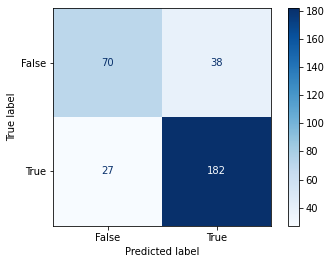

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


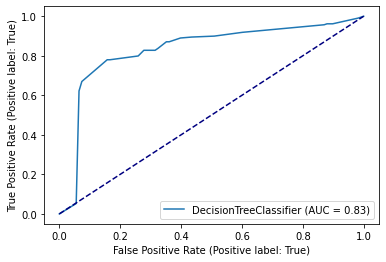

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()
plot_confusion_matrix(best_dt, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
plt.show()

fig, ax = plt.subplots()
plot_roc_curve(best_dt, X_test, y_test, ax=ax) 
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()

Random Forest

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [ ]:
rfc_cv_score

array([0.69587156, 0.84394495, 0.83623853, 0.79477064, 0.90768519,
       0.60972222, 0.88851852, 0.96611111, 0.96648148, 0.89648148])

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


=== Confusion Matrix ===
[[ 50  51]
 [ 21 195]]


=== Classification Report ===
              precision    recall  f1-score   support

       False       0.70      0.50      0.58       101
        True       0.79      0.90      0.84       216

    accuracy                           0.77       317
   macro avg       0.75      0.70      0.71       317
weighted avg       0.76      0.77      0.76       317



=== All AUC Scores ===
[0.69587156 0.84394495 0.83623853 0.79477064 0.90768519 0.60972222
 0.88851852 0.96611111 0.96648148 0.89648148]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8405825688073394


In [ ]:
print("Test set score:", rfc.score(X_test, y_test))

Test set score: 0.7728706624605678


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


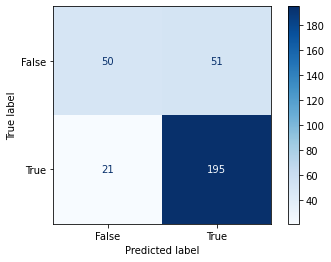

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


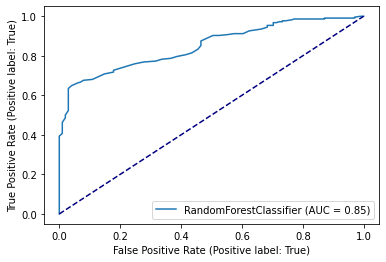

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()
plot_confusion_matrix(rfc, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
plt.show()

fig, ax = plt.subplots()
plot_roc_curve(rfc, X_test, y_test, ax=ax) 
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()

In [ ]:
y.value_counts(normalize = True)

True     0.684343
False    0.315657
Name: target, dtype: float64

SVM

linear [0.69811321 0.7672956  0.77358491 0.73584906 0.83544304 0.64556962
 0.83544304 0.82278481 0.80379747 0.56329114]
=== Confusion Matrix ===
[[ 61  40]
 [ 55 161]]


=== Classification Report ===
              precision    recall  f1-score   support

       False       0.53      0.60      0.56       101
        True       0.80      0.75      0.77       216

    accuracy                           0.70       317
   macro avg       0.66      0.67      0.67       317
weighted avg       0.71      0.70      0.71       317



=== All AUC Scores ===
[0.69811321 0.7672956  0.77358491 0.73584906 0.83544304 0.64556962
 0.83544304 0.82278481 0.80379747 0.56329114]


=== Mean AUC Score ===
Mean AUC Score - SVM:  0.7481171881219648


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


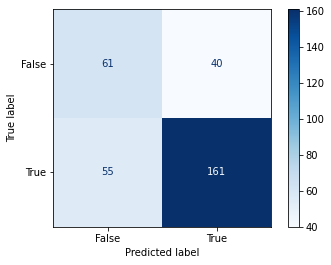

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


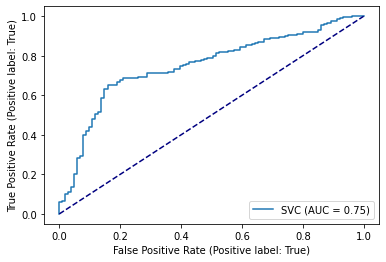

In [ ]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

kernel_functions = ['linear', 'sigmoid', 'rbf', 'poly']
for kernel_function in kernel_functions:
  clf = svm.SVC(kernel=kernel_function)
  clf.fit(X_train,y_train)
  # predictions
  clf_predict = clf.predict(X_test)
  clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
  print(kernel_function, clf_cv_score)
  print("=== Confusion Matrix ===")
  print(confusion_matrix(y_test, clf_predict))
  print('\n')
  print("=== Classification Report ===")
  print(classification_report(y_test, clf_predict))
  print('\n')
  print("=== All AUC Scores ===")
  print(clf_cv_score)
  print('\n')
  print("=== Mean AUC Score ===")
  print("Mean AUC Score - SVM: ", clf_cv_score.mean())



In [ ]:
  #Returning plots for best kernel function
  
  clf = svm.SVC(kernel='linear')
  clf.fit(X_train,y_train)
  # predictions
  clf_predict = clf.predict(X_test)
  clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
  print(kernel_function, clf_cv_score)
  print("=== Confusion Matrix ===")
  print(confusion_matrix(y_test, clf_predict))
  print('\n')
  print("=== Classification Report ===")
  print(classification_report(y_test, clf_predict))
  print('\n')
  print("=== All AUC Scores ===")
  print(clf_cv_score)
  print('\n')
  print("=== Mean AUC Score ===")
  print("Mean AUC Score - SVM: ", clf_cv_score.mean())

  fig, ax = plt.subplots()
  plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
  plt.show()

  fig, ax = plt.subplots()
  plot_roc_curve(clf, X_test, y_test, ax=ax) 
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.show()

K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
knn_cv_score = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

In [ ]:
knn_cv_score 

array([0.7933945 , 0.79192661, 0.72229358, 0.68045872, 0.83425926,
       0.56277778, 0.74898148, 0.725     , 0.84925926, 0.69222222])

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predicted))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predicted))
print('\n')
print("=== All AUC Scores ===")
print(knn_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - K Neighbors: ", knn_cv_score.mean())

=== Confusion Matrix ===
[[ 34  67]
 [ 37 179]]


=== Classification Report ===
              precision    recall  f1-score   support

       False       0.48      0.34      0.40       101
        True       0.73      0.83      0.77       216

    accuracy                           0.67       317
   macro avg       0.60      0.58      0.59       317
weighted avg       0.65      0.67      0.65       317



=== All AUC Scores ===
[0.7933945  0.79192661 0.72229358 0.68045872 0.83425926 0.56277778
 0.74898148 0.725      0.84925926 0.69222222]


=== Mean AUC Score ===
Mean AUC Score - K Neighbors:  0.7400573394495413


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


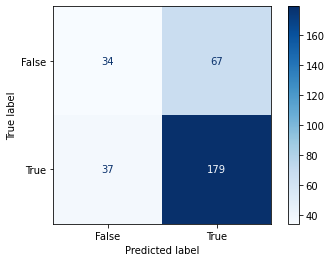

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


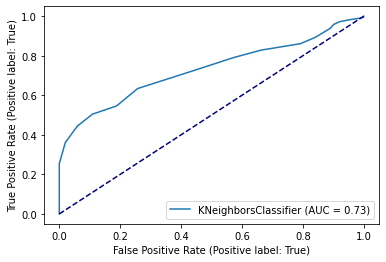

In [ ]:
fig, ax = plt.subplots()
plot_confusion_matrix(model, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
plt.show()

fig, ax = plt.subplots()
plot_roc_curve(model, X_test, y_test, ax=ax) 
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()

Sequential Neural Network

In [71]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import AveragePooling2D, Dropout
import keras.optimizers

model = Sequential()
model.add(Dense(512, activation='ELU', input_dim=2196))
model.add(Dense(512, activation='ELU'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [72]:
history_callback = model.fit(X_train, y_train, epochs=100, validation_split = 0.2)
#, validation_data = (X_test, y_test)

Epoch 1/100
32/32 [==============================] - 2s 23ms/step - loss: 4935.0264 - accuracy: 0.5785 - val_loss: 1014.0522 - val_accuracy: 0.4528
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 1093.5701 - accuracy: 0.6111 - val_loss: 2340.5886 - val_accuracy: 0.6063
Epoch 3/100
32/32 [==============================] - 0s 15ms/step - loss: 932.9833 - accuracy: 0.6160 - val_loss: 1719.4285 - val_accuracy: 0.6181
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 641.4028 - accuracy: 0.6407 - val_loss: 783.3248 - val_accuracy: 0.6102
Epoch 5/100
32/32 [==============================] - 1s 16ms/step - loss: 658.2103 - accuracy: 0.6476 - val_loss: 1560.4639 - val_accuracy: 0.6102
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 2074.8191 - accuracy: 0.6071 - val_loss: 1370.8910 - val_accuracy: 0.6142
Epoch 7/100
32/32 [==============================] - 0s 15ms/step - loss: 878.9467 - accuracy: 0.6545 - val_loss: 38

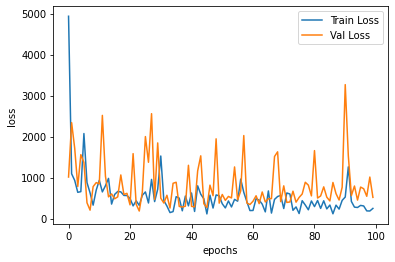

In [73]:
import matplotlib.pyplot as plt

hist = pd.DataFrame(history_callback.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"], label="Train Loss")
ax.plot(hist.index, hist["val_loss"], label="Val Loss")
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
ax.legend()
plt.show()

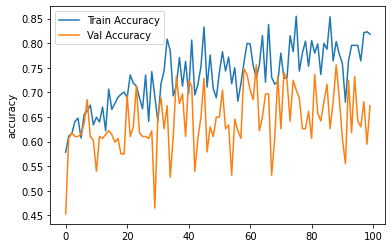

In [74]:
fig, ax = plt.subplots()
ax.plot(hist.index, hist["accuracy"], label="Train Accuracy")
ax.plot(hist.index, hist["val_accuracy"], label="Val Accuracy")
ax.set_ylabel("accuracy")
ax.legend()
plt.show()

In [75]:
predicted= model.predict(X_test)

10/10 [==============================] - 0s 5ms/step


In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(predicted.round(), y_test)

0.669166314603577

In [77]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 407.322
Test Accuracy: 0.732


Improving the Random Forest Model

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#rfc = RandomForestClassifier()

#param_grid = {
#    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 200, 300, 1000]
#}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)
#CV_rfc.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [ ]:
rfc1=RandomForestClassifier(
 max_depth= 210,
 max_features = 250,
 min_samples_leaf = 6,
 min_samples_split = 8,
 n_estimators = 800)
# predictions
rfc1.fit(X_train, y_train)
predicted = rfc1.predict(X_test)

In [ ]:
roc_auc_score(predicted.round(), y_test)

0.8066269284712483

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


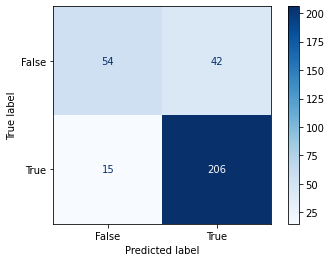

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


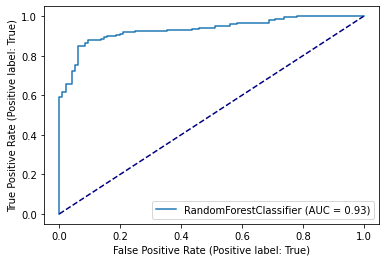

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots()
plot_confusion_matrix(rfc1, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
plt.show()

fig, ax = plt.subplots()
plot_roc_curve(rfc1, X_test, y_test, ax=ax) 
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()

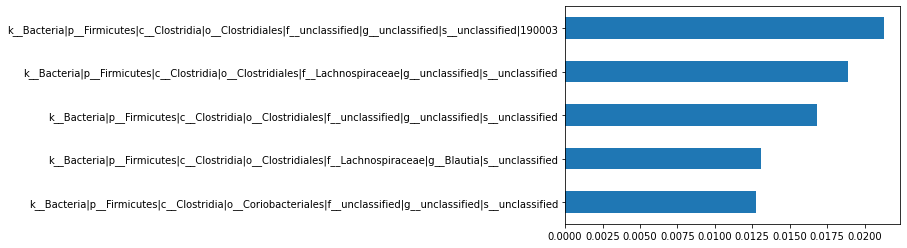

In [ ]:
feat_importances = pd.Series(rfc1.feature_importances_, index=column_names)
feat_importances.sort_values()[-6:-1].plot(kind='barh')

## MILK

In [ ]:
df = pd.read_csv('/content/qiime_three.txt', sep = '\t', index_col = 0)

df = df.transpose()

y = pd.read_csv('/content/merged_three_Countrymetadata.tsv', sep = '\t')[['SampleID', 'Milk']]

y.rename(columns = {'Milk': 'target'}, inplace = True)

df.reset_index(inplace = True)
df.rename(columns = {'sample': 'index', 'index':'SampleID'}, inplace = True)

df['SampleID'] = df['SampleID'].astype(int)

y['SampleID'] = y['SampleID'].astype(float)

y['SampleID'].dtype

df = df.merge(y, how = 'left', on = 'SampleID')

X = df.drop('target', axis=1)
y = df['target']

print("Class distribution:")
print(y.value_counts())

Class distribution:
True     821
False    763
Name: target, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rfc1=RandomForestClassifier(
 max_depth= 210,
 max_features = 250,
 min_samples_leaf = 6,
 min_samples_split = 8,
 n_estimators = 800)
# predictions
rfc1.fit(X_train, y_train)
predicted = rfc1.predict(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


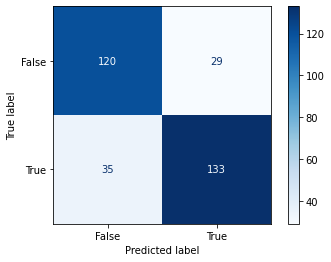

In [ ]:
fig, ax = plt.subplots()
plot_confusion_matrix(rfc1, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


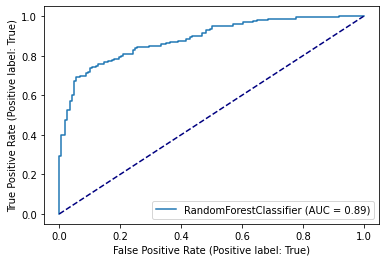

In [ ]:
fig, ax = plt.subplots()
plot_roc_curve(rfc1, X_test, y_test, ax=ax) 
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()

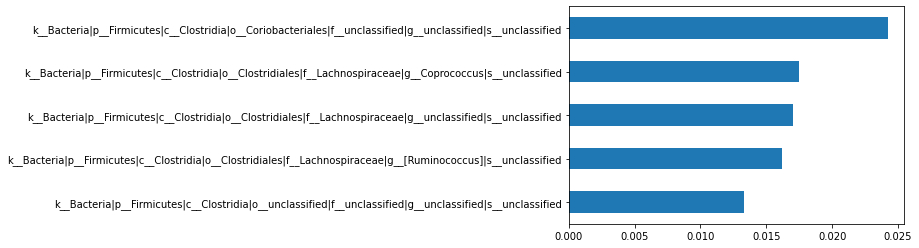

In [ ]:
feat_importances = pd.Series(rfc1.feature_importances_, index=column_names)
feat_importances.sort_values()[-6:-1].plot(kind='barh')

# Eggs

In [ ]:
df = pd.read_csv('/content/qiime_three.txt', sep = '\t', index_col = 0)

df = df.transpose()

y = pd.read_csv('/content/merged_three_Countrymetadata.tsv', sep = '\t')[['SampleID', 'Eggs']]

y.rename(columns = {'Eggs': 'target'}, inplace = True)

df.reset_index(inplace = True)
df.rename(columns = {'sample': 'index', 'index':'SampleID'}, inplace = True)

df['SampleID'] = df['SampleID'].astype(int)

y['SampleID'] = y['SampleID'].astype(float)

y['SampleID'].dtype

df = df.merge(y, how = 'left', on = 'SampleID')

X = df.drop('target', axis=1)
y = df['target']

print("Class distribution:")
print(y.value_counts())

Class distribution:
False    858
True     726
Name: target, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rfc1=RandomForestClassifier(
 max_depth= 210,
 max_features = 250,
 min_samples_leaf = 6,
 min_samples_split = 8,
 n_estimators = 800)
# predictions
rfc1.fit(X_train, y_train)
predicted = rfc1.predict(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


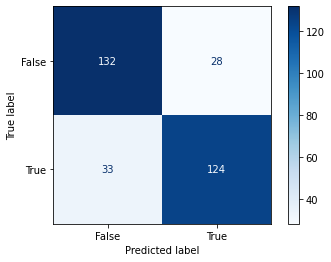

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


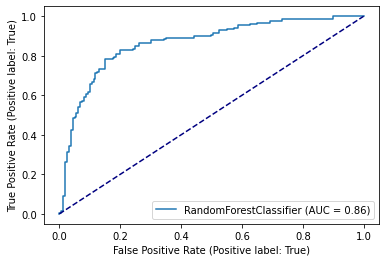

In [ ]:
fig, ax = plt.subplots()
plot_confusion_matrix(rfc1, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
plt.show()

fig, ax = plt.subplots()
plot_roc_curve(rfc1, X_test, y_test, ax=ax) 
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()

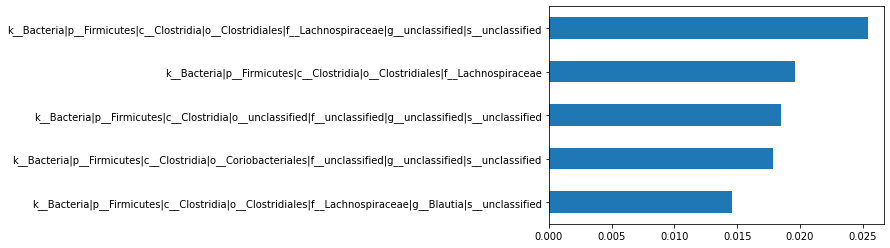

In [ ]:
feat_importances = pd.Series(rfc1.feature_importances_, index=column_names)
feat_importances.sort_values()[-6:-1].plot(kind='barh')